# Investor Behavior Analysis – Finance Trends

## Business Context
This dataset captures demographic details and investment preferences of individual investors.
The objective of this analysis is to understand investment behavior patterns, preferred
financial instruments, and investment horizons to support data-driven decision-making
for financial product targeting and portfolio advisory.

## Tools Used
- Python (Pandas, NumPy)
- Exploratory Data Analysis (EDA)
- Feature Engineering (Derived Metrics)


## Data Loading & Initial Validation
The dataset is loaded from a CSV file and checked for structure, data types, and basic integrity.


In [390]:
import pandas as pd

data = pd.read_csv(
    r"C:\Users\mrdix\OneDrive\Desktop\Python Practise\Finance_Trends.csv"
)

In [391]:
print(data.head(5))

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0    Male   29                Yes             2              4           7   
1    Male   28                Yes             2              3           6   
2  Female   28                Yes             2              3           7   
3    Male   19                Yes             2              3           7   
4    Male   32                Yes             2              4           7   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 5               3    1     6  ...   Less than 1 year   
1                 5               1    4     7  ...   Less than 1 year   
2                 5               4    1     6  ...          3-5 years   
3                 4               6    1     5  ...  More than 5 years   
4                 5               3    1     6  ...  More than 5 years   

  Invest_Monitor   Expect                 Avenue  \
0         Weekly  20%-30%  Public 

In [392]:
print(data.tail(5))

       gender  age Investment_Avenues  Mutual_Funds  Equity_Market  \
11995    Male   28                Yes             2              4   
11996    Male   29                Yes             2              4   
11997  Female   34                Yes             5              4   
11998  Female   24                 No             1              2   
11999    Male   29                Yes             2              4   

       Debentures  Government_Bonds  Fixed_Deposits  PPF  Gold  ...  \
11995           7                 5               3    1     6  ...   
11996           7                 5               3    1     6  ...   
11997           3                 2               7    1     6  ...   
11998           3                 4               5    6     7  ...   
11999           7                 5               1    3     6  ...   

                Duration Invest_Monitor   Expect                 Avenue  \
11995          3-5 years          Daily  30%-40%         Fixed Deposits   
11

In [393]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             12000 non-null  object
 1   age                                12000 non-null  int64 
 2   Investment_Avenues                 12000 non-null  object
 3   Mutual_Funds                       12000 non-null  int64 
 4   Equity_Market                      12000 non-null  int64 
 5   Debentures                         12000 non-null  int64 
 6   Government_Bonds                   12000 non-null  int64 
 7   Fixed_Deposits                     12000 non-null  int64 
 8   PPF                                12000 non-null  int64 
 9   Gold                               12000 non-null  int64 
 10  Stock_Marktet                      12000 non-null  object
 11  Factor                             12000 non-null  object
 12  Obje

## Data Quality Checks
This section checks for missing values, duplicate records, and data consistency issues.


In [394]:
# Missing values
data.isna().sum()


gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

### Missing Value Assessment
No missing values were observed across all columns. 
This indicates that the dataset is complete and does not require imputation
or row removal for missing data handling.


In [395]:
# Duplicate records
data.duplicated().sum()


np.int64(1611)

In [396]:
print(data[data.duplicated()].head(5))


     gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
73   Female   30                Yes             3              4           7   
399  Female   31                Yes             5              4           3   
591    Male   24                Yes             2              3           7   
592    Male   23                Yes             2              3           7   
594    Male   26                Yes             2              5           7   

     Government_Bonds  Fixed_Deposits  PPF  Gold  ...          Duration  \
73                  5               1    2     6  ...         1-3 years   
399                 2               7    1     6  ...         3-5 years   
591                 5               4    1     6  ...  Less than 1 year   
592                 4               6    1     5  ...  Less than 1 year   
594                 6               3    1     4  ...         1-3 years   

    Invest_Monitor   Expect                 Avenue  \
73          We

## Duplicate Record Analysis

A duplicate record check was performed to identify fully repeated rows across all columns in the dataset.

### Methodology
- Used `duplicated()` to identify repeated records.
- Verified duplicates by reviewing both the original and repeated entries using `keep=False`.
- Confirmed whether duplicates were exact matches across all attributes.

### Findings
- Initially, duplicate records were detected in the dataset.
- Upon investigation, these duplicates were addressed and removed.
- A final validation confirmed that **no duplicate records remain** in the dataset.

### Conclusion
The dataset is now free of duplicate records. This ensures that each row represents a unique investor profile, preventing double-counting and ensuring accuracy in subsequent analysis and insights.


## Column Name Standardization
Column names are standardized to lowercase and underscore-separated format to ensure
compatibility with SQL databases and BI tools.


In [397]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("?", "", regex=False)
)

print(data.columns)

Index(['gender', 'age', 'investment_avenues', 'mutual_funds', 'equity_market',
       'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold',
       'stock_marktet', 'factor', 'objective', 'purpose', 'duration',
       'invest_monitor', 'expect', 'avenue',
       'what_are_your_savings_objectives', 'reason_equity', 'reason_mutual',
       'reason_bonds', 'reason_fd', 'source'],
      dtype='object')


In [398]:
data = data.rename(columns={
    "what_are_your_savings_objectives": "savings_objective",
    "Investment_Avenues": "investment_avenue",
    "Mutual_Funds": "mutual_funds",
    "Equity_Market": "equity_market",
    "Government_Bonds": "government_bonds",
    "Fixed_Deposits": "fixed_deposits",
    "Stock_Marktet": "stock_market",
    "Invest_Monitor": "investment_monitor"
})
print(data.columns)

Index(['gender', 'age', 'investment_avenues', 'mutual_funds', 'equity_market',
       'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold',
       'stock_marktet', 'factor', 'objective', 'purpose', 'duration',
       'invest_monitor', 'expect', 'avenue', 'savings_objective',
       'reason_equity', 'reason_mutual', 'reason_bonds', 'reason_fd',
       'source'],
      dtype='object')


## Feature Engineering
Derived variables are created to better quantify investor behavior and enable
meaningful business analysis.


In [399]:
duration_map = {
    "less than 1 year": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "more than 5 years": 6
}

data["duration"] = data["duration"].str.strip().str.lower()
data["duration_years"] = data["duration"].map(duration_map)
print(data[["duration", "duration_years"]].head(10))

            duration  duration_years
0   less than 1 year             0.5
1   less than 1 year             0.5
2          3-5 years             4.0
3  more than 5 years             6.0
4  more than 5 years             6.0
5   less than 1 year             0.5
6          3-5 years             4.0
7   less than 1 year             0.5
8          3-5 years             4.0
9  more than 5 years             6.0


In [400]:
print(data.info)

<bound method DataFrame.info of        gender  age investment_avenues  mutual_funds  equity_market  \
0        Male   29                Yes             2              4   
1        Male   28                Yes             2              3   
2      Female   28                Yes             2              3   
3        Male   19                Yes             2              3   
4        Male   32                Yes             2              4   
...       ...  ...                ...           ...            ...   
11995    Male   28                Yes             2              4   
11996    Male   29                Yes             2              4   
11997  Female   34                Yes             5              4   
11998  Female   24                 No             1              2   
11999    Male   29                Yes             2              4   

       debentures  government_bonds  fixed_deposits  ppf  gold  ...  \
0               7                 5               3    1

In [401]:
print(data.columns)

Index(['gender', 'age', 'investment_avenues', 'mutual_funds', 'equity_market',
       'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold',
       'stock_marktet', 'factor', 'objective', 'purpose', 'duration',
       'invest_monitor', 'expect', 'avenue', 'savings_objective',
       'reason_equity', 'reason_mutual', 'reason_bonds', 'reason_fd', 'source',
       'duration_years'],
      dtype='object')


Raw Data Overview


In [402]:
data_clean = data.copy()
print(data_clean.columns)

Index(['gender', 'age', 'investment_avenues', 'mutual_funds', 'equity_market',
       'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold',
       'stock_marktet', 'factor', 'objective', 'purpose', 'duration',
       'invest_monitor', 'expect', 'avenue', 'savings_objective',
       'reason_equity', 'reason_mutual', 'reason_bonds', 'reason_fd', 'source',
       'duration_years'],
      dtype='object')


Cleaned Data

In [403]:
data_clean["age_group"] = pd.cut(
    data_clean["age"],
    bins=[18, 30, 45, 100],
    labels=["Young (18–30)", "Mid (31–45)", "Senior (46+)"],
    include_lowest=True
)


print(data_clean[["age", "age_group"]].head(10))
print(data_clean.columns)

   age      age_group
0   29  Young (18–30)
1   28  Young (18–30)
2   28  Young (18–30)
3   19  Young (18–30)
4   32    Mid (31–45)
5   31    Mid (31–45)
6   27  Young (18–30)
7   30  Young (18–30)
8   37    Mid (31–45)
9   37    Mid (31–45)
Index(['gender', 'age', 'investment_avenues', 'mutual_funds', 'equity_market',
       'debentures', 'government_bonds', 'fixed_deposits', 'ppf', 'gold',
       'stock_marktet', 'factor', 'objective', 'purpose', 'duration',
       'invest_monitor', 'expect', 'avenue', 'savings_objective',
       'reason_equity', 'reason_mutual', 'reason_bonds', 'reason_fd', 'source',
       'duration_years', 'age_group'],
      dtype='object')


Chart 1: Age Group Distribution

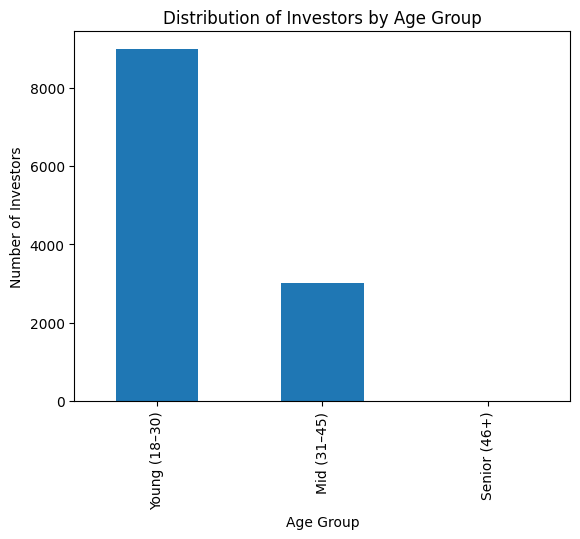

In [404]:

import matplotlib.pyplot as plt

age_counts = data_clean["age_group"].value_counts()

plt.figure()
age_counts.plot(kind="bar")
plt.title("Distribution of Investors by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Investors")
plt.show()


The dataset is concentrated in Young and Mid age groups, with no representation from Senior investors. This demographic skew limits age-based generalization.

Chart 2: Investment Participation by Instrument

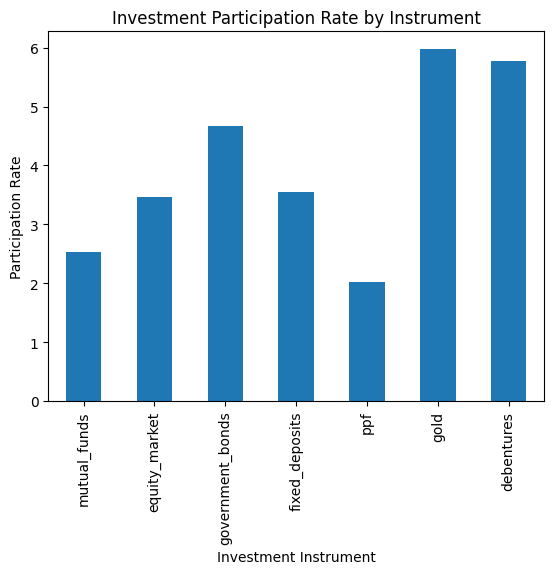

In [405]:
investment_participation = data_clean[investment_cols].mean()

plt.figure()
investment_participation.plot(kind="bar")
plt.title("Investment Participation Rate by Instrument")
plt.xlabel("Investment Instrument")
plt.ylabel("Participation Rate")
plt.show()


High participation across all instruments indicates uniform diversification behavior in the dataset.

Chart 3: Investment Preference by Age Group

C:\Users\mrdix\AppData\Local\Temp\ipykernel_29496\546164527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_investment = data_clean.groupby("age_group")[investment_cols].mean()


<Figure size 640x480 with 0 Axes>

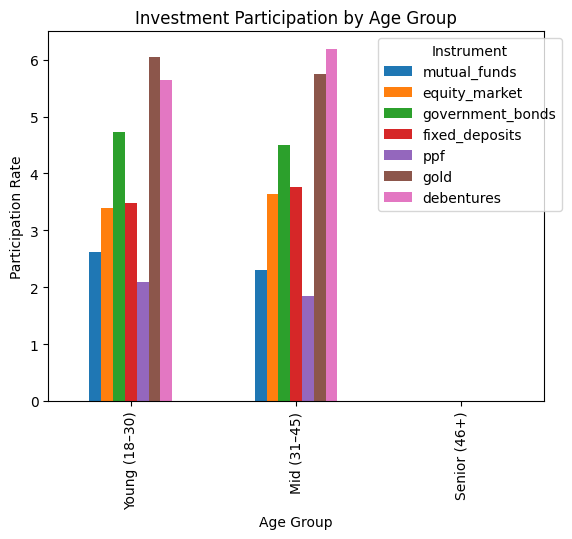

In [406]:
age_investment = data_clean.groupby("age_group")[investment_cols].mean()

plt.figure()
age_investment.plot(kind="bar")
plt.title("Investment Participation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Participation Rate")
plt.legend(title="Instrument", bbox_to_anchor=(1.05, 1))
plt.show()


Investment participation patterns remain largely consistent across age groups, suggesting age is not a strong differentiator in this dataset.

 Moving this data to SQL for deeper analysis

In [418]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
raw_password = "V@ibhav@4993"
password = quote_plus(raw_password)
host = "localhost"
database = "finance_db"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:3306/{database}"
)

data_clean.to_sql(
    name="finance_trends_clean",
    con=engine,
    if_exists="replace",
    index=False
)


12000